In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import precision_score,recall_score, f1_score


In [2]:
data2 = pd.read_csv('data.csv')
data2

,Unnamed: 0,Course,College,Year Level,School Year,Graduated,No.,Appno,SCHOOL,Cntr,Date,Pr1,Pr2,Pr3,Pr4,Pr5,Oapr,Word,SY
0,0,BAT,College of Agriculture,1,2018-2019,1,957.0,1819-06087,MARCELO SPINOLA SCHOOL,ZAM,3/11/2018,68.50,48.40,85.06,89.31,43.49,74.25,Seventy Four Point Twenty Five,2018-2019
1,1,BAT,College of Agriculture,1,2018-2019,1,1699.0,1819-02185,DON PABLO LORENZO MEMORIAL HIGH SCHOOL,ZAM,2/25/2018,74.80,48.40,59.25,10.45,53.29,60.09,Sixty Point Nine,2018-2019
2,2,BAT,College of Agriculture,1,2018-2019,0,3175.0,1819-12104,ILIGAN CAPITOL COLLEGE,TUN,4/15/2018,84.91,48.40,51.68,34.54,33.69,68.07,Sixty Eight Point Seven,2018-2019
3,3,BAT,College of Agriculture,1,2018-2019,1,6723.0,1819-06076,MARCELO SPINOLA SCHOOL,ZAM,3/11/2018,58.56,71.99,59.25,24.91,63.10,61.37,Sixty One Point Thirty Seven,2018-2019
4,4,BAT,College of Agriculture,1,2018-2019,0,11065.0,1819-05353,SYSTEM TECHNOLOGY INSTITUTE,ZAM,3/4/2018,61.05,35.70,59.25,70.61,63.10,61.37,Sixty One Point Thirty Seven,2018-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6247,6247,STEP-SPSP,CTE,1,2019-2020,0,11730.0,2021-17602,WESTERN MINDANAO STATE UNIVERSITY,SPE,2/19/2020,1.26,6.94,24.36,53.82,1.36,1.79,One Point Seventy Nine,2020-2021
6248,6248,STEP-SPSP,CTE,1,2019-2020,0,10242.0,1819-01956,WESTERN MINDANAO STATE UNIVERSITY,ZAM,2/25/2018,1.72,15.12,7.54,63.45,26.06,4.40,Four Point Forty,2018-2019
6249,6249,STEP-SPSP,CTE,1,2019-2020,0,13167.0,1920-15206,WESTERN MINDANAO STATE UNIVERSITY,OTC,2/13/2019,3.94,10.15,51.68,63.45,9.69,9.31,Zero Nine Point Thirty One,2019-2020
6250,6250,STEP-SPSP,CTE,1,2019-2020,0,13716.0,1920-15200,WESTERN MINDANAO STATE UNIVERSITY,ZAM,2/13/2019,7.83,5.49,4.27,0.00,0.15,0.19,Point Nineteen,2019-2020


In [3]:
#drop the other columns
data2.drop(['Unnamed: 0','Year Level','School Year','No.','Appno','SCHOOL','Cntr','Date','Word','SY'],axis=1,inplace=True)

In [4]:
data2

,Course,College,Graduated,Pr1,Pr2,Pr3,Pr4,Pr5,Oapr
0,BAT,College of Agriculture,1,68.50,48.40,85.06,89.31,43.49,74.25
1,BAT,College of Agriculture,1,74.80,48.40,59.25,10.45,53.29,60.09
2,BAT,College of Agriculture,0,84.91,48.40,51.68,34.54,33.69,68.07
3,BAT,College of Agriculture,1,58.56,71.99,59.25,24.91,63.10,61.37
4,BAT,College of Agriculture,0,61.05,35.70,59.25,70.61,63.10,61.37
...,...,...,...,...,...,...,...,...,...
6247,STEP-SPSP,CTE,0,1.26,6.94,24.36,53.82,1.36,1.79
6248,STEP-SPSP,CTE,0,1.72,15.12,7.54,63.45,26.06,4.40
6249,STEP-SPSP,CTE,0,3.94,10.15,51.68,63.45,9.69,9.31
6250,STEP-SPSP,CTE,0,7.83,5.49,4.27,0.00,0.15,0.19


In [5]:
data2.dtypes

Course        object
College       object
Graduated      int64
Pr1          float64
Pr2          float64
Pr3          float64
Pr4          float64
Pr5          float64
Oapr         float64
dtype: object

In [6]:
#checking unique value in column course
print('Number of Unique value in column Course:', data2['Course'].nunique())
print('Courses: ',data2['Course'].unique()) 

Number of Unique value in column Course: 81
Courses:  ['BAT' 'BS AGRI' 'BS AGRIBUS' 'BS FT' 'BSAB' 'BSAT' 'DATBAT' 'BS ARCH'
 'BA BROAD' 'BS CE' 'BSN' 'BSESS' 'BS IS' 'BSSW01' 'BS GE' 'BSCS' 'AB AS'
 'BS COE' 'AB' 'AB IS' 'BA POLSCI' 'DAL' 'BS CRIM' 'BS CS' 'BSCS01'
 'BA ELS' 'BS CD' 'AB FIL' 'BSIT' 'BSHM' 'BS AGRO' 'BS ES' 'BS F'
 'AHRS-REG' 'BS HE' 'BS HRM' 'BS ND' 'BAHISTORY' 'AB ENG' 'AB HISTORY'
 'AB JOURN' 'AB POLSCI' 'ABMC-BROAD' 'ABMC-JOURN' 'BS STAT' 'BPED'
 'BS ACCTNG' 'BS ABE' 'BS PHYSICS' 'BS ECE' 'BS EE' 'BS ENE' 'BS IME'
 'BS ME' 'BS SE' 'BSIE' 'BS BIO' 'BS CHEM' 'BS MATH' 'BSSW' 'BCAE' 'BECE'
 'BEED' 'BSED' 'BSED SS' 'BSED VEDUC' 'BSEED' 'BSNE' 'STEP-SPSP' 'BSA'
 'BS CRIM01' 'AHMS' 'AB MASSCOM' 'BA JOURN' 'MN MED-SRG' 'BPE' 'DISC'
 'BEED-MAPE' 'BSED01' 'BSED02' 'PEC']


In [7]:
#treating inconsistency 
data2['Course'].mask(data2['Course'] == 'BAT', 'BACHELOR OF AGRICULTURAL TECHNOLOGY', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS AGRI', 'BS AGRICULTURE', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS AGRIBUS', 'BACHELOR AGRI-BUSINESS', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS FT', 'BS FOOD TECHNOLOGY', inplace=True)
data2['Course'].mask(data2['Course'] == 'BSAB', 'BACHELOR AGRI-BUSINESS', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS ARCH', 'BS ARCHITECTURE', inplace=True)
data2['Course'].mask(data2['Course'] == 'BA BROAD', 'AB BROADCASTING', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS CE', 'BS CIVIL ENGINEERING', inplace=True)
data2['Course'].mask(data2['Course'] == 'BSN', 'BS NURSING', inplace=True)
data2['Course'].mask(data2['Course'] == 'BSESS', 'BS EXERCISE AND SPORTS SCIENCE', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS IS', 'BS ISLAMIC STUDIES', inplace=True)
data2['Course'].mask(data2['Course'] == 'BSSW01', 'BS SOCIAL WORK', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS GE', 'BS GEODETIC ENGINEERING', inplace=True)
data2['Course'].mask(data2['Course'] == 'BSCS', 'BS COMPUTER SCIENCE', inplace=True)
data2['Course'].mask(data2['Course'] == 'AB AS', 'BS ASIAN STUDIES', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS COE', 'BS COMPUTER ENGINEERING', inplace=True)
data2['Course'].mask(data2['Course'] == 'AB IS', 'BS ISLAMIC STUDIES', inplace=True)
data2['Course'].mask(data2['Course'] == 'BA POLSCI', 'AB POLITICAL SCIENCE', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS CRIM', 'BS CRIMINOLOGY', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS CS', 'BS COMPUTER SCIENCE', inplace=True)
data2['Course'].mask(data2['Course'] == 'BSCS01', 'BS COMPUTER SCIENCE', inplace=True)
data2['Course'].mask(data2['Course'] == 'BA ELS', 'BA ELS', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS CD', 'BS COMMUNITY DEVELOPMENT', inplace=True)
data2['Course'].mask(data2['Course'] == 'AB FIL', 'BATSILYER NG SINING SA FILIPINO', inplace=True)
data2['Course'].mask(data2['Course'] == 'BSIT', 'BS INFORMATION TECHNOLOGY', inplace=True)
data2['Course'].mask(data2['Course'] == 'BSHM', 'BS HOME MANAGEMENT', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS AGRO', 'BS AGRO-FORESTRY', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS ES', 'BS ENVIRONMENTAL SCIENCE', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS F', 'BS FORESTRY', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS HE', 'BS HOME ECONOMICS', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS HRM', 'BS HOME MANAGEMENT', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS ND', 'BS NUTRITION AND DIETETICS', inplace=True)
data2['Course'].mask(data2['Course'] == 'BAHISTORY', 'AB HISTORY', inplace=True)
data2['Course'].mask(data2['Course'] == 'AB ENG', 'BA ELS', inplace=True)
data2['Course'].mask(data2['Course'] == 'AB JOURN', 'AB JOURNALISM', inplace=True)
data2['Course'].mask(data2['Course'] == 'AB POLSCI', 'AB POLITICAL SCIENCE', inplace=True)
data2['Course'].mask(data2['Course'] == 'ABMC-BROAD', 'AB BROADCASTING', inplace=True)
data2['Course'].mask(data2['Course'] == 'ABMC-JOURN', 'AB JOURNALISM', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS STAT', 'BS STATISTIC', inplace=True)
data2['Course'].mask(data2['Course'] == 'BPED', 'BACHELOR OF PHYSICAL EDUCATION', inplace=True)
data2['Course'].mask(data2['Course'] == 'BPE', 'BACHELOR OF PHYSICAL EDUCATION', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS ACCTNG', 'BS ACCOUNTING', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS ABE', 'BS AGRICULTURAL ENGINEERING', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS ECE', 'BS ELECTRONICS COMMUNICATION ENGINEERING', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS EE', 'BS ELECTRICAL ENGINEERING', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS ENE', 'BS ENVIRONMENTAL ENGINEERING', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS IME', 'BS INDUSTRIAL ENGINEERING', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS ME', 'BS MECHANICAL ENGINEERING', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS SE', 'BS SANITARY ENGINEERING', inplace=True)
data2['Course'].mask(data2['Course'] == 'BSIE', 'BS INDUSTRIAL ENGINEERING', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS BIO', 'BS BIOLOGY', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS CHEM', 'BS CHEMISTRY', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS MATH', 'BS MATHEMATICS', inplace=True)
data2['Course'].mask(data2['Course'] == 'BSSW', 'BS SOCIAL WORK', inplace=True)
data2['Course'].mask(data2['Course'] == 'BCAE', 'BACHELOR OF CULTURE AND ARTS EDUCATION', inplace=True)
data2['Course'].mask(data2['Course'] == 'BECE', 'BACHELOR EARLY CHILDHOOD EDUCATION', inplace=True)
data2['Course'].mask(data2['Course'] == 'BEED', 'BACHELOR OF ELEMENTARY EDUCATION', inplace=True)
data2['Course'].mask(data2['Course'] == 'BSED', 'BACHELOR OF SECONDARY EDUCATION', inplace=True)
data2['Course'].mask(data2['Course'] == 'BSED SS', 'BACHELOR OF SECONDARY EDUCATION', inplace=True)
data2['Course'].mask(data2['Course'] == 'BSED VEDUC', 'BACHELOR OF SECONDARY EDUCATION', inplace=True)
data2['Course'].mask(data2['Course'] == 'BSEED', 'BACHELOR OF ELEMENTARY EDUCATION', inplace=True)
data2['Course'].mask(data2['Course'] == 'BSNE', 'BACHELOR OF SPECIAL NEED EDUCATION', inplace=True)
data2['Course'].mask(data2['Course'] == 'BSA', 'BS AGRICULTURE', inplace=True)
data2['Course'].mask(data2['Course'] == 'BS CRIM01', 'BS CRIMINOLOGY', inplace=True)
data2['Course'].mask(data2['Course'] == 'BA JOURN', 'AB JOURNALISM', inplace=True)
data2['Course'].mask(data2['Course'] == 'BSED01', 'BACHELOR OF SECONDARY EDUCATION', inplace=True)
data2['Course'].mask(data2['Course'] == 'BSED02', 'BACHELOR OF SECONDARY EDUCATION', inplace=True)
data2['Course'].mask(data2['Course'] == 'BSAT', 'BACHELOR OF AGRICULTURAL TECHNOLOGY', inplace=True)


In [8]:
data2.drop(data2[(data2['Course'] == 'DATBAT')].index, inplace = True)
data2.drop(data2[(data2['Course'] == 'AB')].index, inplace = True)
data2.drop(data2[(data2['Course'] == 'DAL')].index, inplace = True)
data2.drop(data2[(data2['Course'] == 'AHRS-REG')].index, inplace = True)
data2.drop(data2[(data2['Course'] == 'STEP-SPSP')].index, inplace = True)
data2.drop(data2[(data2['Course'] == 'AHMS')].index, inplace = True)
data2.drop(data2[(data2['Course'] == 'PEC')].index, inplace = True)
data2.drop(data2[(data2['Course'] == 'MN MED-SRG')].index, inplace = True)
data2.drop(data2[(data2['Course'] == 'DISC')].index, inplace = True)
data2.drop(data2[(data2['Course'] == 'BEED-MAPE')].index, inplace = True)
data2.drop(data2[(data2['Course'] == 'AB MASSCOM')].index, inplace = True)

In [9]:
#checking unique value in column course
print('Number of Unique value in column Course:', data2['Course'].nunique())
print('Courses: ',data2['Course'].unique()) 

Number of Unique value in column Course: 48
Courses:  ['BACHELOR OF AGRICULTURAL TECHNOLOGY' 'BS AGRICULTURE'
 'BACHELOR AGRI-BUSINESS' 'BS FOOD TECHNOLOGY' 'BS ARCHITECTURE'
 'AB BROADCASTING' 'BS CIVIL ENGINEERING' 'BS NURSING'
 'BS EXERCISE AND SPORTS SCIENCE' 'BS ISLAMIC STUDIES' 'BS SOCIAL WORK'
 'BS GEODETIC ENGINEERING' 'BS COMPUTER SCIENCE' 'BS ASIAN STUDIES'
 'BS COMPUTER ENGINEERING' 'AB POLITICAL SCIENCE' 'BS CRIMINOLOGY'
 'BA ELS' 'BS COMMUNITY DEVELOPMENT' 'BATSILYER NG SINING SA FILIPINO'
 'BS INFORMATION TECHNOLOGY' 'BS HOME MANAGEMENT' 'BS AGRO-FORESTRY'
 'BS ENVIRONMENTAL SCIENCE' 'BS FORESTRY' 'BS HOME ECONOMICS'
 'BS NUTRITION AND DIETETICS' 'AB HISTORY' 'AB JOURNALISM' 'BS STATISTIC'
 'BACHELOR OF PHYSICAL EDUCATION' 'BS ACCOUNTING'
 'BS AGRICULTURAL ENGINEERING' 'BS PHYSICS'
 'BS ELECTRONICS COMMUNICATION ENGINEERING' 'BS ELECTRICAL ENGINEERING'
 'BS ENVIRONMENTAL ENGINEERING' 'BS INDUSTRIAL ENGINEERING'
 'BS MECHANICAL ENGINEERING' 'BS SANITARY ENGINEERING' 'BS BI

# Data Visualiation

<AxesSubplot:xlabel='Oapr', ylabel='Count'>

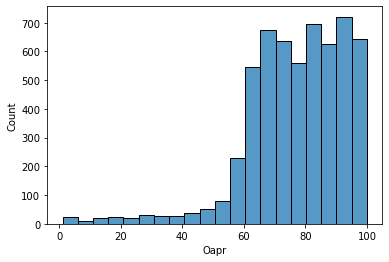

In [10]:
sns.histplot(x=data2['Oapr'],bins=20)

C:\Users\Jessa Francisco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Oapr'>

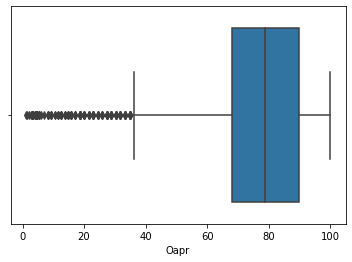

In [11]:
#checking outliers
sns.boxplot(data2['Oapr'])

In [12]:
remove=data2.loc[(data2['Oapr']<60)]
remove

,Course,College,Graduated,Pr1,Pr2,Pr3,Pr4,Pr5,Oapr
53,BS ARCHITECTURE,College of Architecture,0,72.78,30.03,44.12,24.91,43.49,54.31
55,BS ARCHITECTURE,College of Architecture,0,28.82,54.75,66.81,18.16,72.90,44.06
120,BS ARCHITECTURE,College of Architecture,0,9.69,35.70,44.12,34.54,26.06,18.60
190,BS ARCHITECTURE,College of Architecture,0,68.50,30.03,59.25,14.31,63.10,54.31
215,BS ASIAN STUDIES,CAIS,1,49.95,35.70,29.96,70.61,79.78,52.87
...,...,...,...,...,...,...,...,...,...
5616,BS BIOLOGY,CSM,1,41.05,54.75,29.96,18.16,20.60,33.28
5745,BS STATISTIC,CSM,1,37.99,25.06,51.68,24.91,43.49,34.82
5773,BS COMMUNITY DEVELOPMENT,CSWCD,1,41.05,54.75,24.36,63.45,33.69,42.52
5782,BS COMMUNITY DEVELOPMENT,CSWCD,1,25.99,66.85,85.06,53.82,53.29,54.31


In [13]:
data2=data2.loc[(data2['Oapr']>=60)]
data2

,Course,College,Graduated,Pr1,Pr2,Pr3,Pr4,Pr5,Oapr
0,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,1,68.50,48.40,85.06,89.31,43.49,74.25
1,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,1,74.80,48.40,59.25,10.45,53.29,60.09
2,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,0,84.91,48.40,51.68,34.54,33.69,68.07
3,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,1,58.56,71.99,59.25,24.91,63.10,61.37
4,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,0,61.05,35.70,59.25,70.61,63.10,61.37
...,...,...,...,...,...,...,...,...,...
6228,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,90.77,92.88,96.28,93.38,87.72,95.42
6229,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,72.78,77.12,18.75,75.28,72.90,70.30
6230,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,88.66,77.12,59.25,79.96,63.10,84.19
6231,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,84.91,54.75,85.06,53.82,53.29,78.81


<AxesSubplot:>

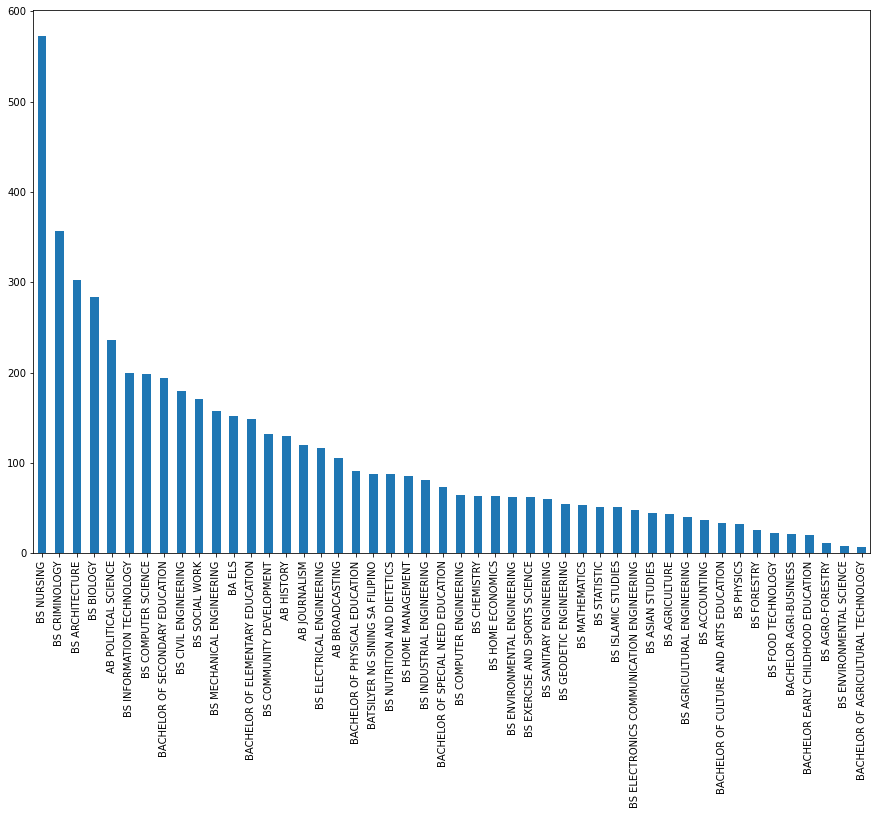

In [14]:
data2['Course'].value_counts().plot( kind='bar', figsize=(15,10))

<function matplotlib.pyplot.show(close=None, block=None)>

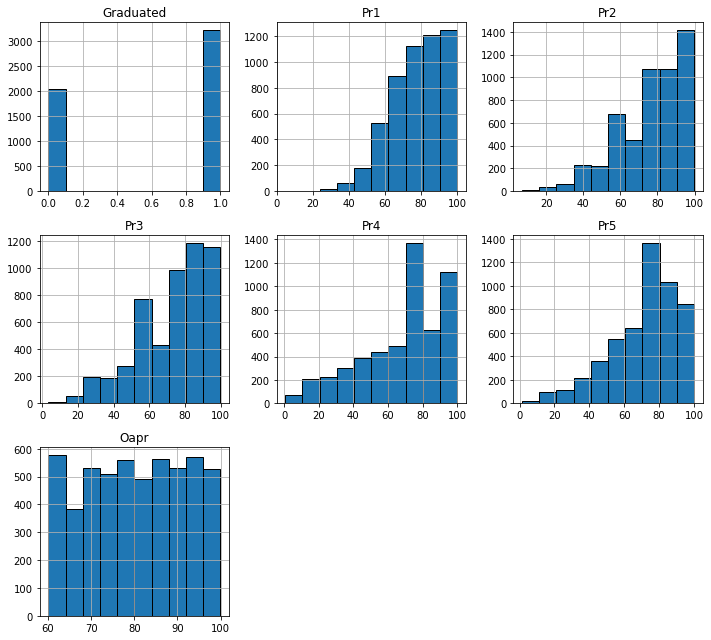

In [15]:
#plot histogram 
data2.hist(figsize=(10,9), ec="k")
plt.tight_layout()
plt.show

<AxesSubplot:>

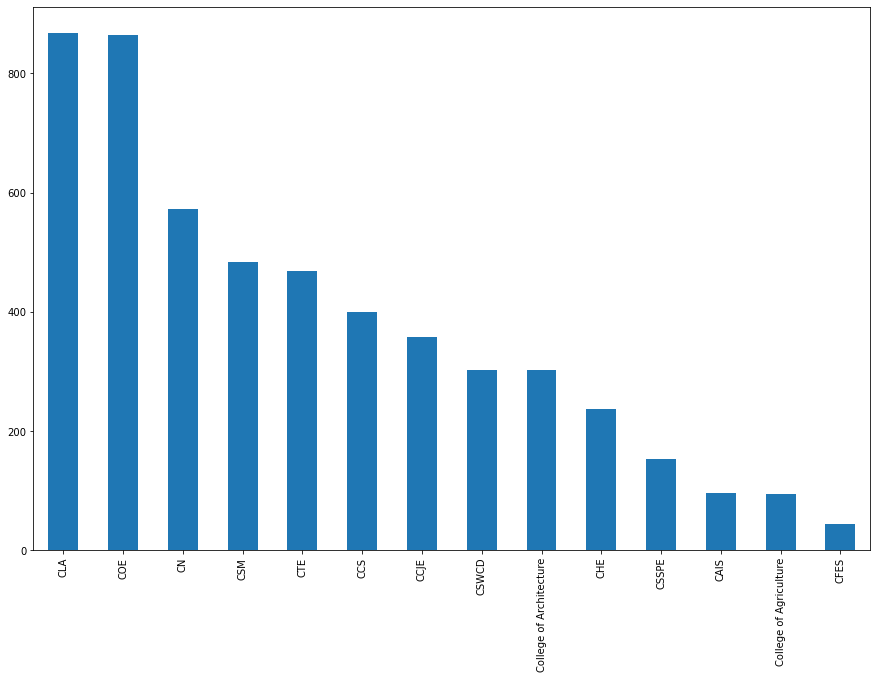

In [16]:
data2['College'].value_counts().plot( kind='bar', figsize=(15,10))

[Text(0, 0, '2033'), Text(0, 0, '3212')]

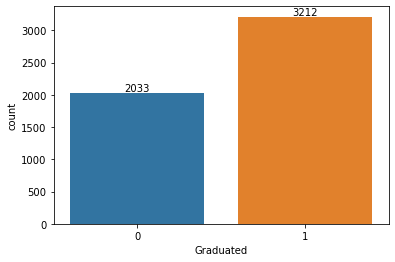

In [17]:
ax = sns.countplot(x='Graduated', data=data2)
ax.bar_label(ax.containers[0])

# Feature Engineering

In [18]:
df_sum = [
     'Pr1',
     'Pr2',
     'Pr3',
     'Pr4',
     'Pr5',
     'Oapr' 
]
df_sum = data2[df_sum]
row_sums = df_sum.sum(axis=1)
data2['Sum'] = row_sums
data2

C:\Users\Jessa Francisco\AppData\Local\Temp\ipykernel_4844\529803651.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Sum'] = row_sums


,Course,College,Graduated,Pr1,Pr2,Pr3,Pr4,Pr5,Oapr,Sum
0,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,1,68.50,48.40,85.06,89.31,43.49,74.25,409.01
1,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,1,74.80,48.40,59.25,10.45,53.29,60.09,306.28
2,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,0,84.91,48.40,51.68,34.54,33.69,68.07,321.29
3,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,1,58.56,71.99,59.25,24.91,63.10,61.37,339.18
4,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,0,61.05,35.70,59.25,70.61,63.10,61.37,351.08
...,...,...,...,...,...,...,...,...,...,...
6228,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,90.77,92.88,96.28,93.38,87.72,95.42,556.45
6229,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,72.78,77.12,18.75,75.28,72.90,70.30,387.13
6230,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,88.66,77.12,59.25,79.96,63.10,84.19,452.28
6231,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,84.91,54.75,85.06,53.82,53.29,78.81,410.64


In [19]:
#Adding the Pr1 which is the English Proficiency and the Pr2 which is the Reading Comprehension
Pr1_Pr2 = [
     'Pr1',
     'Pr2'
]
Pr1_Pr2 = data2[Pr1_Pr2]
row_sums = Pr1_Pr2.sum(axis=1)
data2['English/Reading'] = row_sums
data2

C:\Users\Jessa Francisco\AppData\Local\Temp\ipykernel_4844\3882810343.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['English/Reading'] = row_sums


,Course,College,Graduated,Pr1,Pr2,Pr3,Pr4,Pr5,Oapr,Sum,English/Reading
0,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,1,68.50,48.40,85.06,89.31,43.49,74.25,409.01,116.90
1,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,1,74.80,48.40,59.25,10.45,53.29,60.09,306.28,123.20
2,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,0,84.91,48.40,51.68,34.54,33.69,68.07,321.29,133.31
3,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,1,58.56,71.99,59.25,24.91,63.10,61.37,339.18,130.55
4,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,0,61.05,35.70,59.25,70.61,63.10,61.37,351.08,96.75
...,...,...,...,...,...,...,...,...,...,...,...
6228,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,90.77,92.88,96.28,93.38,87.72,95.42,556.45,183.65
6229,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,72.78,77.12,18.75,75.28,72.90,70.30,387.13,149.90
6230,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,88.66,77.12,59.25,79.96,63.10,84.19,452.28,165.78
6231,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,84.91,54.75,85.06,53.82,53.29,78.81,410.64,139.66


In [20]:
#Adding the Pr4 which is the Quantitative Skills and the Pr5 which is the Abstract Thinking Skills
Pr4_Pr5 = [
     'Pr4',
     'Pr5'
]
Pr4_Pr5 = data2[Pr4_Pr5]
row_sums = Pr4_Pr5.sum(axis=1)
data2['Math/Logic'] = row_sums
data2

C:\Users\Jessa Francisco\AppData\Local\Temp\ipykernel_4844\902706638.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Math/Logic'] = row_sums


,Course,College,Graduated,Pr1,Pr2,Pr3,Pr4,Pr5,Oapr,Sum,English/Reading,Math/Logic
0,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,1,68.50,48.40,85.06,89.31,43.49,74.25,409.01,116.90,132.80
1,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,1,74.80,48.40,59.25,10.45,53.29,60.09,306.28,123.20,63.74
2,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,0,84.91,48.40,51.68,34.54,33.69,68.07,321.29,133.31,68.23
3,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,1,58.56,71.99,59.25,24.91,63.10,61.37,339.18,130.55,88.01
4,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,0,61.05,35.70,59.25,70.61,63.10,61.37,351.08,96.75,133.71
...,...,...,...,...,...,...,...,...,...,...,...,...
6228,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,90.77,92.88,96.28,93.38,87.72,95.42,556.45,183.65,181.10
6229,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,72.78,77.12,18.75,75.28,72.90,70.30,387.13,149.90,148.18
6230,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,88.66,77.12,59.25,79.96,63.10,84.19,452.28,165.78,143.06
6231,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,84.91,54.75,85.06,53.82,53.29,78.81,410.64,139.66,107.11


In [21]:
pr = [
     'Pr1',
     'Pr2',
     'Pr3',
     'Pr4',
     'Pr5'
]
pr = data2[pr]
row_sums = pr.sum(axis=1)
data2['PR'] = row_sums
data2

C:\Users\Jessa Francisco\AppData\Local\Temp\ipykernel_4844\977496016.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['PR'] = row_sums


,Course,College,Graduated,Pr1,Pr2,Pr3,Pr4,Pr5,Oapr,Sum,English/Reading,Math/Logic,PR
0,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,1,68.50,48.40,85.06,89.31,43.49,74.25,409.01,116.90,132.80,334.76
1,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,1,74.80,48.40,59.25,10.45,53.29,60.09,306.28,123.20,63.74,246.19
2,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,0,84.91,48.40,51.68,34.54,33.69,68.07,321.29,133.31,68.23,253.22
3,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,1,58.56,71.99,59.25,24.91,63.10,61.37,339.18,130.55,88.01,277.81
4,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,0,61.05,35.70,59.25,70.61,63.10,61.37,351.08,96.75,133.71,289.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6228,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,90.77,92.88,96.28,93.38,87.72,95.42,556.45,183.65,181.10,461.03
6229,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,72.78,77.12,18.75,75.28,72.90,70.30,387.13,149.90,148.18,316.83
6230,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,88.66,77.12,59.25,79.96,63.10,84.19,452.28,165.78,143.06,368.09
6231,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,84.91,54.75,85.06,53.82,53.29,78.81,410.64,139.66,107.11,331.83


In [22]:
data2['Numerical_Course'], uniques = pd.factorize(data2['Course'])
data2['Numerical_College'], uniques = pd.factorize(data2['College'])

C:\Users\Jessa Francisco\AppData\Local\Temp\ipykernel_4844\846098561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Numerical_Course'], uniques = pd.factorize(data2['Course'])
C:\Users\Jessa Francisco\AppData\Local\Temp\ipykernel_4844\846098561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Numerical_College'], uniques = pd.factorize(data2['College'])


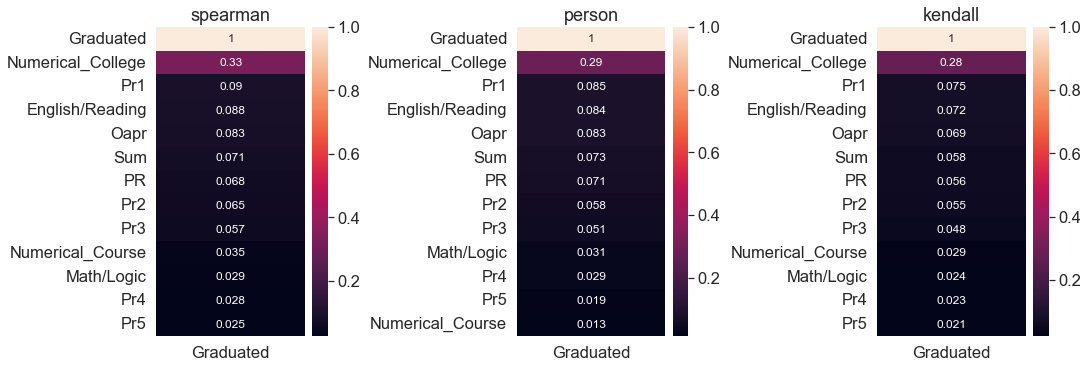

In [23]:
# set the font size
sns.set(font_scale=1.5)

# compute the correlation matrices
SpearmanCorr_ = data2.corr(method="spearman")[['Graduated']].sort_values(by='Graduated', ascending=False)
PearsonCorr_ = data2.corr(method="pearson")[['Graduated']].sort_values(by='Graduated', ascending=False)
KendallCorr_ = data2.corr(method="kendall")[['Graduated']].sort_values(by='Graduated', ascending=False)

# create the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15,5), constrained_layout=True)

# plot the heatmaps with enlarged font size
sns.heatmap(SpearmanCorr_, annot=True, annot_kws={"size": 12}, ax=axes[0]).set_title("spearman")
sns.heatmap(PearsonCorr_, annot=True, annot_kws={"size": 12}, ax=axes[1]).set_title("person")
sns.heatmap(KendallCorr_, annot=True, annot_kws={"size": 12}, ax=axes[2]).set_title("kendall")

# display the heatmaps
plt.show()

20 data extracted from the dataset for future validation

In [24]:
data2 = pd.read_csv('val_data.csv')
data2

,Unnamed: 0,Course,College,Graduated,Pr1,Pr2,Pr3,Pr4,Pr5,Oapr,Sum,English/Reading,Math/Logic,PR,Numerical_Course,Numerical_College
0,0,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,1,68.50,48.40,85.06,89.31,43.49,74.25,409.01,116.90,132.80,334.76,0,0
1,1,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,1,74.80,48.40,59.25,10.45,53.29,60.09,306.28,123.20,63.74,246.19,0,0
2,2,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,0,84.91,48.40,51.68,34.54,33.69,68.07,321.29,133.31,68.23,253.22,0,0
3,3,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,1,58.56,71.99,59.25,24.91,63.10,61.37,339.18,130.55,88.01,277.81,0,0
4,6,BS AGRICULTURE,College of Agriculture,1,52.90,77.12,29.96,75.28,53.29,61.37,349.92,130.02,128.57,288.55,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5220,6228,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,90.77,92.88,96.28,93.38,87.72,95.42,556.45,183.65,181.10,461.03,47,13
5221,6229,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,72.78,77.12,18.75,75.28,72.90,70.30,387.13,149.90,148.18,316.83,47,13
5222,6230,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,88.66,77.12,59.25,79.96,63.10,84.19,452.28,165.78,143.06,368.09,47,13
5223,6231,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,84.91,54.75,85.06,53.82,53.29,78.81,410.64,139.66,107.11,331.83,47,13


In [25]:
new_data= data2.drop(data2[(data2['Course'] == 'BACHELOR OF AGRICULTURAL TECHNOLOGY')].index)

In [26]:
# from sklearn.model_selection import train_test_split
data2_train,data2_test = train_test_split(new_data, test_size=0.2, random_state=0)

In [27]:
print('Training: ', data2_train.shape)
print('Testing: ', data2_test.shape)

Training:  (4176, 16)
Testing:  (1044, 16)


In [28]:
feature = [
     'Pr1',
     'Pr2',
     'Pr3',
     'Pr4',
     'Pr5',
     'Oapr'
    
]
target ='College'

In [29]:
x_train = data2_train[feature]
y_train = data2_train[target]
x_test = data2_test[feature]
y_test = data2_test[target]

# Model 1

### Random Forest

In [30]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()

# Train the model
model_rfc.fit(x_train, y_train)

# Predict using the trained model
pred_rfc = model_rfc.predict(x_test)
accuracy = accuracy_score(y_test, pred_rfc)
print("Accuracy:", accuracy)

Accuracy: 0.2021072796934866


In [31]:
from sklearn.metrics import log_loss

# Predict the class probabilities for new samples
y_pred = model_rfc.predict_proba(x_test)

# Calculate the log loss
log_loss_rfc = log_loss(y_test, y_pred)

print("Log loss: ", log_loss_rfc)

Log loss:  4.497012077774051


In [32]:
#KFOLD 

pred_rfc = model_rfc.predict(x_test)

cv = KFold(n_splits=2, random_state=0, shuffle=True)
#evaluate model
auc_rfc = cross_val_score(model_rfc, x_train, y_train, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
accuracy_rfc = cross_val_score(model_rfc, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
pd.DataFrame([[accuracy_score(y_test, pred_rfc), '-'],[np.mean(accuracy_rfc), np.mean(auc_rfc)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.202107,-
K-fold,0.192529,0.610907


In [33]:
#calculating precision, recall, and f1 score
precision_rfc = precision_score(y_test, pred_rfc,average='weighted')
recall_rfc = recall_score(y_test, pred_rfc,average='weighted')
f1_rfc = f1_score(y_test, pred_rfc,average='weighted')
print('Precision: ',precision_rfc)
print('Recall: ',recall_rfc)
print('F1: ',f1_rfc)

Precision:  0.17453197074594134
Recall:  0.2021072796934866
F1:  0.17985975590234704


### KNN

In [34]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()

# Train the model
model_knn.fit(x_train, y_train)

# Predict using the trained model
pred_knn = model_knn.predict(x_test)
accuracy = accuracy_score(y_test, pred_knn)
print("Accuracy:", accuracy)

Accuracy: 0.15613026819923373


In [35]:
from sklearn.metrics import log_loss

# Predict the class probabilities for new samples
y_pred = model_knn.predict_proba(x_test)

# Calculate the log loss
log_loss_knn = log_loss(y_test, y_pred)

print("Log loss: ", log_loss_knn)

Log loss:  19.812534888585972


In [36]:
#KFOLD 
pred_knn = model_knn.predict(x_test)

cv = KFold(n_splits=2, random_state=0, shuffle=True)
#evaluate model
auc_knn = cross_val_score(model_knn, x_train, y_train, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
accuracy_knn = cross_val_score(model_knn, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
pd.DataFrame([[accuracy_score(y_test, pred_knn), '-'],[np.mean(accuracy_knn), np.mean(auc_knn)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.156130,-
K-fold,0.167385,0.55413


In [37]:
#calculating precision, recall, and f1 score
precision_knn = precision_score(y_test, pred_knn,average='weighted')
recall_knn = recall_score(y_test, pred_knn,average='weighted')
f1_knn = f1_score(y_test, pred_knn,average='weighted')
print('Precision: ',precision_knn)
print('Recall: ',recall_knn)
print('F1: ',f1_knn)

Precision:  0.1475873656476639
Recall:  0.15613026819923373
F1:  0.14868691064156492


### Naive Bayes

In [38]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()

# Train the model
model_naive.fit(x_train, y_train)

# Predict using the trained model
pred_naive = model_naive.predict(x_test)
accuracy = accuracy_score(y_test, pred_naive)
print("Accuracy:", accuracy)

Accuracy: 0.23659003831417624


In [39]:
from sklearn.metrics import log_loss

# Predict the class probabilities for new samples
y_pred = model_naive.predict_proba(x_test)

# Calculate the log loss
log_loss_naive = log_loss(y_test, y_pred)

print("Log loss: ", log_loss_naive)

Log loss:  2.6483939077794454


In [40]:
#KFOLD 
pred_naive = model_naive.predict(x_test)

cv = KFold(n_splits=2, random_state=0, shuffle=True)
#evaluate model
auc_naive = cross_val_score(model_naive, x_train, y_train, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
accuracy_naive = cross_val_score(model_naive, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
pd.DataFrame([[accuracy_score(y_test, pred_naive), '-'],[np.mean(accuracy_naive), np.mean(auc_naive)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.23659,-
K-fold,0.23228,0.674982


In [41]:
#calculating precision, recall, and f1 score
precision_naive = precision_score(y_test, pred_naive,average='weighted')
recall_naive = recall_score(y_test, pred_naive,average='weighted')
f1_naive = f1_score(y_test, pred_naive,average='weighted')
print('Precision: ',precision_naive)
print('Recall: ',recall_naive)
print('F1: ',f1_naive)

Precision:  0.12477440029083467
Recall:  0.23659003831417624
F1:  0.14790867017105946


C:\Users\Jessa Francisco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

In [42]:
# SVM
from sklearn.svm import SVC

# Create an SVM model
model_svm = SVC(probability=True)

# Train the model
model_svm.fit(x_train, y_train)

# Predict using the trained model
pred_svm = model_svm.predict(x_test)
accuracy = accuracy_score(y_test, pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.25862068965517243


In [43]:
from sklearn.metrics import log_loss

# Predict the class probabilities for new samples
y_pred = model_svm.predict_proba(x_test)

# Calculate the log loss
log_loss_svm = log_loss(y_test, y_pred)

print("Log loss: ", log_loss_svm)

Log loss:  2.262445319272478


In [44]:
#KFOLD 
pred_svm = model_svm.predict(x_test)

cv = KFold(n_splits=2, random_state=0, shuffle=True)
#evaluate model
auc_svm = cross_val_score(model_svm, x_train, y_train, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
accuracy_svm = cross_val_score(model_svm, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
pd.DataFrame([[accuracy_score(y_test, pred_svm), '-'],[np.mean(accuracy_svm), np.mean(auc_svm)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.258621,-
K-fold,0.256705,0.663227


In [45]:
#calculating precision, recall, and f1 score
precision_svm = precision_score(y_test, pred_svm,average='weighted')
recall_svm = recall_score(y_test, pred_svm,average='weighted')
f1_svm = f1_score(y_test, pred_svm,average='weighted')
print('Precision: ',precision_svm)
print('Recall: ',recall_svm)
print('F1: ',f1_svm)

Precision:  0.15577060677707372
Recall:  0.25862068965517243
F1:  0.16687963024435074


C:\Users\Jessa Francisco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree

In [46]:
# Desicion Tree
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()
# Train the model
model_tree.fit(x_train , y_train)

# Predict using the trained model
pred_tree = model_tree.predict(x_test)
accuracy = accuracy_score(y_test, pred_tree)
print("Accuracy:", accuracy)

Accuracy: 0.1532567049808429


In [47]:
from sklearn.metrics import log_loss

# Predict the class probabilities for new samples
y_pred = model_tree.predict_proba(x_test)

# Calculate the log loss
log_loss_tree = log_loss(y_test, y_pred)

print("Log loss: ", log_loss_tree)

Log loss:  30.520385769310465


In [48]:
#KFOLD 
pred_tree = model_tree.predict(x_test)

cv = KFold(n_splits=2, random_state=0, shuffle=True)
#evaluate model
auc_tree = cross_val_score(model_tree, x_train, y_train, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
accuracy_tree = cross_val_score(model_tree, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
pd.DataFrame([[accuracy_score(y_test, pred_tree), '-'],[np.mean(accuracy_tree), np.mean(auc_tree)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.153257,-
K-fold,0.148228,0.513402


In [49]:
#calculating precision, recall, and f1 score
precision_tree = precision_score(y_test, pred_tree,average='weighted')
recall_tree = recall_score(y_test, pred_tree,average='weighted')
f1_tree = f1_score(y_test, pred_tree,average='weighted')
print('Precision: ',precision_tree)
print('Recall: ',recall_tree)
print('F1: ',f1_tree)

Precision:  0.15444552891077168
Recall:  0.1532567049808429
F1:  0.15287078959478884


In [50]:
print('FEATURES [Pr1, Pr2, Pr3, Pr4, Pr5, OAPR]')
print('Train:')
print('\tRandom Forest:',accuracy_score(y_train, model_rfc.predict(x_train)))
print('\tNaive Bayes:',accuracy_score(y_train, model_naive.predict(x_train)))
print('\tSVM:',accuracy_score(y_train, model_svm.predict(x_train)))
print('\tDecision Tree:',accuracy_score(y_train, model_tree.predict(x_train)))
print('\tKNN:',accuracy_score(y_train, model_knn.predict(x_train)))
print('\n\n')
print('Test:')
print('\tRandom Forest:',accuracy_score(y_test,pred_rfc))
print('\tNaive Bayes:',accuracy_score(y_test,pred_naive))
print('\tSVM:',accuracy_score(y_test,pred_svm))
print('\tDecision Tree:',accuracy_score(y_test,pred_tree))
print('\tKNN:',accuracy_score(y_test,pred_knn))

FEATURES [Pr1, Pr2, Pr3, Pr4, Pr5, OAPR]
Train:
	Random Forest: 0.9889846743295019
	Naive Bayes: 0.23347701149425287
	SVM: 0.2717911877394636
	Decision Tree: 0.9889846743295019
	KNN: 0.40804597701149425



Test:
	Random Forest: 0.2021072796934866
	Naive Bayes: 0.23659003831417624
	SVM: 0.25862068965517243
	Decision Tree: 0.1532567049808429
	KNN: 0.15613026819923373


In [51]:
df = {
    'Model': ['Random Forest', 'Naive Bayes', 'SVM', 'KNN', 'Decision Tree'],
    'Accuracy': [accuracy_score(y_test,pred_rfc), accuracy_score(y_test,pred_naive), accuracy_score(y_test,pred_svm), accuracy_score(y_test,pred_knn),accuracy_score(y_test,pred_tree)],
    'AUC': [np.mean(auc_rfc), np.mean(auc_naive), np.mean(auc_svm), np.mean(auc_knn),np.mean(auc_tree)],
    'Log loss': [log_loss_rfc, log_loss_naive, log_loss_svm, log_loss_knn,log_loss_tree],
    'Precision': [precision_rfc, precision_naive, precision_svm, precision_knn,precision_tree],
    'Recall': [recall_rfc, recall_naive, recall_svm, recall_knn,recall_tree],
    'F1 Score': [f1_rfc, f1_naive, f1_svm, f1_knn,f1_tree],

}

df = pd.DataFrame(df)
df


,Model,Accuracy,AUC,Log loss,Precision,Recall,F1 Score
0,Random Forest,0.202107,0.610907,4.497012,0.174532,0.202107,0.179860
1,Naive Bayes,0.236590,0.674982,2.648394,0.124774,0.236590,0.147909
2,SVM,0.258621,0.663227,2.262445,0.155771,0.258621,0.166880
3,KNN,0.156130,0.554130,19.812535,0.147587,0.156130,0.148687
4,Decision Tree,0.153257,0.513402,30.520386,0.154446,0.153257,0.152871


# Hyperparameter Tuning 

In [52]:
feature = [
     'Pr1',
     'Pr2',
     'Pr3',
     'Pr4',
     'Pr5',
     'Oapr'
    
]
target ='College'

In [53]:
x_train = data2_train[feature]
y_train = data2_train[target]
x_test = data2_test[feature]
y_test = data2_test[target]

In [54]:
#Random Forest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

np.random.seed(0)
# Define the hyperparameters to search
param_dist1 = {'n_estimators': [150,70,90],
              'max_depth': [None, 5, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Initialize the model
model_random = RandomForestClassifier()

# Perform random search
random_search = RandomizedSearchCV(model_random, param_distributions=param_dist1, n_iter=20, cv=5)
random_search.fit(x_train, y_train)

# Print the best hyperparameters
print("\n\nParameter:",random_search.best_params_)




Parameter: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 5}


In [55]:
#Naive Bayes
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Define the hyperparameters to search
param_grid = {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6]}

# Initialize the model
model_naive = GaussianNB()

# Perform grid search
grid = GridSearchCV(model_naive, param_grid, cv=5)
grid.fit(x_train, y_train)

# Print the best hyperparameters
print("\n\nParameter: ",grid.best_params_)



Parameter:  {'var_smoothing': 1e-10}


In [56]:
#SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the hyperparameters to search
param_grid = {'C': [1, 10, 100, 1000],
              'gamma': [0.001, 0.01, 0.1, 1]}

# Initialize the model
model_svm = SVC(kernel='rbf')

# Perform grid search
grid = GridSearchCV(model_svm, param_grid, cv=5)
grid.fit(x_train, y_train)

# Print the best hyperparameters
print("\n\nParameter: ",grid.best_params_)



Parameter:  {'C': 1, 'gamma': 0.001}


In [57]:
#KNN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


# Define the hyperparameters to search
param_grid = {'n_neighbors': [1, 3, 5, 7, 9],
              'weights': ['uniform', 'distance']}

# Initialize the model
model_knn = KNeighborsClassifier()

# Perform grid search
grid = GridSearchCV(model_knn, param_grid, cv=5)
grid.fit(x_train, y_train)

# Print the best hyperparameters
print("\n\nParameter: ",grid.best_params_)



Parameter:  {'n_neighbors': 9, 'weights': 'distance'}


In [58]:
#Decision Tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameters to search
param_grid = {'max_depth': [1, 3, 5, 7, 9],
              'min_samples_split': [2, 4, 6, 8, 10]}

# Initialize the model
model_tree = DecisionTreeClassifier()

# Perform grid search
grid = GridSearchCV(model_tree, param_grid, cv=5)
grid.fit(x_train, y_train)

# Print the best hyperparameters
print("\n\nParameter: ",grid.best_params_)




Parameter:  {'max_depth': 3, 'min_samples_split': 2}


## Model 1 with the Parameter

### Random Forest

In [59]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(random_state = 0,n_estimators = 150, min_samples_split= 2, min_samples_leaf= 4, max_depth= 5)

# Train the model
model_rfc.fit(x_train, y_train)

# Predict using the trained model
pred_rfc = model_rfc.predict(x_test)
accuracy = accuracy_score(y_test, pred_rfc)
print("Accuracy:", accuracy)

Accuracy: 0.2681992337164751


In [60]:
from sklearn.metrics import log_loss

# Predict the class probabilities for new samples
y_pred = model_rfc.predict_proba(x_test)

# Calculate the log loss
log_loss_rfc = log_loss(y_test, y_pred)

print("Log loss: ", log_loss_rfc)

Log loss:  2.2285608608151697


In [61]:
#KFOLD 

pred_rfc = model_rfc.predict(x_test)

cv = KFold(n_splits=2, random_state=0, shuffle=True)
#evaluate model
auc_rfc = cross_val_score(model_rfc, x_train, y_train, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
accuracy_rfc = cross_val_score(model_rfc, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
pd.DataFrame([[accuracy_score(y_test, pred_rfc), '-'],[np.mean(accuracy_rfc), np.mean(auc_rfc)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.268199,-
K-fold,0.261494,0.676201


In [62]:
#calculating precision, recall, and f1 score
precision_rfc = precision_score(y_test, pred_rfc,average='weighted')
recall_rfc = recall_score(y_test, pred_rfc,average='weighted')
f1_rfc = f1_score(y_test, pred_rfc,average='weighted')
print('Precision: ',precision_rfc)
print('Recall: ',recall_rfc)
print('F1: ',f1_rfc)

Precision:  0.16185068059103697
Recall:  0.2681992337164751
F1:  0.17758755718525834


C:\Users\Jessa Francisco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN

In [63]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors= 9, weights='distance')

# Train the model
model_knn.fit(x_train, y_train)

# Predict using the trained model
pred_knn = model_knn.predict(x_test)
accuracy = accuracy_score(y_test, pred_knn)
print("Accuracy:", accuracy)

Accuracy: 0.18869731800766285


In [64]:
from sklearn.metrics import log_loss

# Predict the class probabilities for new samples
y_pred = model_knn.predict_proba(x_test)

# Calculate the log loss
log_loss_knn = log_loss(y_test, y_pred)

print("Log loss: ", log_loss_knn)

Log loss:  14.538339004220692


In [65]:
#KFOLD 
pred_knn = model_knn.predict(x_test)

cv = KFold(n_splits=2, random_state=0, shuffle=True)
#evaluate model
auc_knn = cross_val_score(model_knn, x_train, y_train, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
accuracy_knn = cross_val_score(model_knn, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
pd.DataFrame([[accuracy_score(y_test, pred_knn), '-'],[np.mean(accuracy_knn), np.mean(auc_knn)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.188697,-
K-fold,0.190374,0.578784


In [66]:
#calculating precision, recall, and f1 score
precision_knn = precision_score(y_test, pred_knn,average='weighted')
recall_knn = recall_score(y_test, pred_knn,average='weighted')
f1_knn = f1_score(y_test, pred_knn,average='weighted')
print('Precision: ',precision_knn)
print('Recall: ',recall_knn)
print('F1: ',f1_knn)

Precision:  0.17385336882575006
Recall:  0.18869731800766285
F1:  0.17396758202089277


### Naive Bayes

In [67]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB(var_smoothing= 1e-10)

# Train the model
model_naive.fit(x_train, y_train)

# Predict using the trained model
pred_naive = model_naive.predict(x_test)
accuracy = accuracy_score(y_test, pred_naive)
print("Accuracy:", accuracy)

Accuracy: 0.23659003831417624


In [68]:
from sklearn.metrics import log_loss

# Predict the class probabilities for new samples
y_pred = model_naive.predict_proba(x_test)

# Calculate the log loss
log_loss_naive = log_loss(y_test, y_pred)

print("Log loss: ", log_loss_naive)

Log loss:  2.6483939106317473


In [69]:
#KFOLD 
pred_naive = model_naive.predict(x_test)

cv = KFold(n_splits=2, random_state=0, shuffle=True)
#evaluate model
auc_naive = cross_val_score(model_naive, x_train, y_train, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
accuracy_naive = cross_val_score(model_naive, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
pd.DataFrame([[accuracy_score(y_test, pred_naive), '-'],[np.mean(accuracy_naive), np.mean(auc_naive)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.23659,-
K-fold,0.23228,0.674982


In [70]:
#calculating precision, recall, and f1 score
precision_naive = precision_score(y_test, pred_naive,average='weighted')
recall_naive = recall_score(y_test, pred_naive,average='weighted')
f1_naive = f1_score(y_test, pred_naive,average='weighted')
print('Precision: ',precision_naive)
print('Recall: ',recall_naive)
print('F1: ',f1_naive)

Precision:  0.12477440029083467
Recall:  0.23659003831417624
F1:  0.14790867017105946


C:\Users\Jessa Francisco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

In [71]:
# SVM
from sklearn.svm import SVC

# Create an SVM model
model_svm = SVC(probability=True,C=1, gamma= 0.001)

# Train the model
model_svm.fit(x_train, y_train)

# Predict using the trained model
pred_svm = model_svm.predict(x_test)
accuracy = accuracy_score(y_test, pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.26053639846743293


In [72]:
from sklearn.metrics import log_loss

# Predict the class probabilities for new samples
y_pred = model_svm.predict_proba(x_test)

# Calculate the log loss
log_loss_svm = log_loss(y_test, y_pred)

print("Log loss: ", log_loss_svm)

Log loss:  2.2714867496637257


In [73]:
#KFOLD 
pred_svm = model_svm.predict(x_test)

cv = KFold(n_splits=2, random_state=0, shuffle=True)
#evaluate model
auc_svm = cross_val_score(model_svm, x_train, y_train, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
accuracy_svm = cross_val_score(model_svm, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
pd.DataFrame([[accuracy_score(y_test, pred_svm), '-'],[np.mean(accuracy_svm), np.mean(auc_svm)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.260536,-
K-fold,0.254789,0.662481


In [74]:
#calculating precision, recall, and f1 score
precision_svm = precision_score(y_test, pred_svm,average='weighted')
recall_svm = recall_score(y_test, pred_svm,average='weighted')
f1_svm = f1_score(y_test, pred_svm,average='weighted')
print('Precision: ',precision_svm)
print('Recall: ',recall_svm)
print('F1: ',f1_svm)

Precision:  0.14924436530636434
Recall:  0.26053639846743293
F1:  0.17538146139443234


C:\Users\Jessa Francisco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree

In [75]:
# Desicion Tree
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth= 3, min_samples_split =2)
# Train the model
model_tree.fit(x_train , y_train)

# Predict using the trained model
pred_tree = model_tree.predict(x_test)
accuracy = accuracy_score(y_test, pred_tree)
print("Accuracy:", accuracy)

Accuracy: 0.26340996168582376


In [76]:

from sklearn.metrics import log_loss

# Predict the class probabilities for new samples
y_pred = model_tree.predict_proba(x_test)

# Calculate the log loss
log_loss_tree = log_loss(y_test, y_pred)

print("Log loss: ", log_loss_tree)

Log loss:  2.3391349748108836


In [77]:
#KFOLD 
pred_tree = model_tree.predict(x_test)

cv = KFold(n_splits=2, random_state=0, shuffle=True)
#evaluate model
auc_tree = cross_val_score(model_tree, x_train, y_train, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
accuracy_tree = cross_val_score(model_tree, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
pd.DataFrame([[accuracy_score(y_test, pred_tree), '-'],[np.mean(accuracy_tree), np.mean(auc_tree)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.263410,-
K-fold,0.251437,0.656584


In [78]:
#calculating precision, recall, and f1 score
precision_tree = precision_score(y_test, pred_tree,average='weighted')
recall_tree = recall_score(y_test, pred_tree,average='weighted')
f1_tree = f1_score(y_test, pred_tree,average='weighted')
print('Precision: ',precision_tree)
print('Recall: ',recall_tree)
print('F1: ',f1_tree)

Precision:  0.1541671742622991
Recall:  0.26340996168582376
F1:  0.17281621170095818


C:\Users\Jessa Francisco\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
print('FEATURES [Pr1, Pr2, Pr3, Pr4, Pr5, OAPR]')
print('Train:')
print('\tRandom Forest:',accuracy_score(y_train, model_rfc.predict(x_train)))
print('\tNaive Bayes:',accuracy_score(y_train, model_naive.predict(x_train)))
print('\tSVM:',accuracy_score(y_train, model_svm.predict(x_train)))
print('\tDecision Tree:',accuracy_score(y_train, model_tree.predict(x_train)))
print('\tKNN:',accuracy_score(y_train, model_knn.predict(x_train)))
print('\n\n')
print('Test:')
print('\tRandom Forest:',accuracy_score(y_test,pred_rfc))
print('\tNaive Bayes:',accuracy_score(y_test,pred_naive))
print('\tSVM:',accuracy_score(y_test,pred_svm))
print('\tDecision Tree:',accuracy_score(y_test,pred_tree))
print('\tKNN:',accuracy_score(y_test,pred_knn))

FEATURES [Pr1, Pr2, Pr3, Pr4, Pr5, OAPR]
Train:
	Random Forest: 0.29334291187739464
	Naive Bayes: 0.23347701149425287
	SVM: 0.2921455938697318
	Decision Tree: 0.2636494252873563
	KNN: 0.9889846743295019



Test:
	Random Forest: 0.2681992337164751
	Naive Bayes: 0.23659003831417624
	SVM: 0.26053639846743293
	Decision Tree: 0.26340996168582376
	KNN: 0.18869731800766285


In [80]:
df = {
    'Model': ['Random Forest', 'Naive Bayes', 'SVM', 'KNN', 'Decision Tree'],
    'Accuracy': [accuracy_score(y_test,pred_rfc), accuracy_score(y_test,pred_naive), accuracy_score(y_test,pred_svm), accuracy_score(y_test,pred_knn),accuracy_score(y_test,pred_tree)],
    'AUC': [np.mean(auc_rfc), np.mean(auc_naive), np.mean(auc_svm), np.mean(auc_knn),np.mean(auc_tree)],
    'Log loss': [log_loss_rfc, log_loss_naive, log_loss_svm, log_loss_knn,log_loss_tree],
    'Precision': [precision_rfc, precision_naive, precision_svm, precision_knn,precision_tree],
    'Recall': [recall_rfc, recall_naive, recall_svm, recall_knn,recall_tree],
    'F1 Score': [f1_rfc, f1_naive, f1_svm, f1_knn,f1_tree],

}

df = pd.DataFrame(df)
df


,Model,Accuracy,AUC,Log loss,Precision,Recall,F1 Score
0,Random Forest,0.268199,0.676201,2.228561,0.161851,0.268199,0.177588
1,Naive Bayes,0.236590,0.674982,2.648394,0.124774,0.236590,0.147909
2,SVM,0.260536,0.662481,2.271487,0.149244,0.260536,0.175381
3,KNN,0.188697,0.578784,14.538339,0.173853,0.188697,0.173968
4,Decision Tree,0.263410,0.656584,2.339135,0.154167,0.263410,0.172816


In [81]:
features = [
     'Pr1',
     'Pr2',
     'Pr3',
     'Pr4',
     'Pr5',
     'Oapr',
     'Numerical_Course'
]
target ='Graduated'

In [82]:
x_train = data2_train[features]
y_train = data2_train[target]
x_test = data2_test[features]
y_test = data2_test[target]

# Hyperparameter Tuning

In [83]:
#Random Forest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

np.random.seed(0)
# Define the hyperparameters to search
param_dist1 = {'n_estimators': [150,70,90],
              'max_depth': [None, 5, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Initialize the model
model_random = RandomForestClassifier()

# Perform random search
random_search = RandomizedSearchCV(model_random, param_distributions=param_dist1, n_iter=20, cv=5)
random_search.fit(x_train, y_train)

# Print the best hyperparameters
print("\n\nParameter:",random_search.best_params_)




Parameter: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 30}


In [84]:
#Naive Bayes
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Define the hyperparameters to search
param_grid = {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6]}

# Initialize the model
model_naive = GaussianNB()

# Perform grid search
grid = GridSearchCV(model_naive, param_grid, cv=5)
grid.fit(x_train, y_train)

# Print the best hyperparameters
print("\n\nParameter: ",grid.best_params_)



Parameter:  {'var_smoothing': 1e-10}


In [85]:
#SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the hyperparameters to search
param_grid = {'C': [1, 10, 100, 1000],
              'gamma': [0.001, 0.01, 1]}

# Initialize the model
model_svm = SVC(kernel='rbf')

# Perform grid search
grid = GridSearchCV(model_svm, param_grid, cv=5)
grid.fit(x_train, y_train)

# Print the best hyperparameters
print("\n\nParameter: ",grid.best_params_)



Parameter:  {'C': 10, 'gamma': 1}


In [86]:
#KNN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


# Define the hyperparameters to search
param_grid = {'n_neighbors': [1, 3, 5, 7, 9],
              'weights': ['uniform', 'distance']}

# Initialize the model
model_knn = KNeighborsClassifier()

# Perform grid search
grid = GridSearchCV(model_knn, param_grid, cv=5)
grid.fit(x_train, y_train)

# Print the best hyperparameters
print("\n\nParameter: ",grid.best_params_)



Parameter:  {'n_neighbors': 7, 'weights': 'distance'}


In [87]:
#Decision Tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameters to search
param_grid = {'max_depth': [1, 3, 5, 7, 9],
              'min_samples_split': [2, 4, 6, 8, 10]}

# Initialize the model
model_tree = DecisionTreeClassifier()

# Perform grid search
grid = GridSearchCV(model_tree, param_grid, cv=5)
grid.fit(x_train, y_train)

# Print the best hyperparameters
print("\n\nParameter: ",grid.best_params_)




Parameter:  {'max_depth': 7, 'min_samples_split': 10}


# Model 2

### Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(random_state = 0,n_estimators = 150, min_samples_split= 2, min_samples_leaf= 4, max_depth= 30)

# Train the model
model_rfc.fit(x_train, y_train)

# Predict using the trained model
pred_rfc = model_rfc.predict(x_test)
accuracy = accuracy_score(y_test, pred_rfc)
print("Accuracy:", accuracy)

Accuracy: 0.7049808429118773


In [89]:
from sklearn.metrics import log_loss

# Predict the class probabilities for new samples
y_pred = model_rfc.predict_proba(x_test)

# Calculate the log loss
log_loss_rfc = log_loss(y_test, y_pred)

print("Log loss: ", log_loss_rfc)

Log loss:  0.5833830395401532


In [90]:
#KFOLD 

pred_rfc = model_rfc.predict(x_test)

cv = KFold(n_splits=2, random_state=0, shuffle=True)
#evaluate model
auc_rfc = cross_val_score(model_rfc, x_train, y_train, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
accuracy_rfc = cross_val_score(model_rfc, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
pd.DataFrame([[accuracy_score(y_test, pred_rfc), '-'],[np.mean(accuracy_rfc), np.mean(auc_rfc)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.704981,-
K-fold,0.703784,0.74129


In [91]:
#calculating precision, recall, and f1 score
precision_rfc = precision_score(y_test, pred_rfc,average='weighted')
recall_rfc = recall_score(y_test, pred_rfc,average='weighted')
f1_rfc = f1_score(y_test, pred_rfc,average='weighted')
print('Precision: ',precision_rfc)
print('Recall: ',recall_rfc)
print('F1: ',f1_rfc)

Precision:  0.7023791375753327
Recall:  0.7049808429118773
F1:  0.6919944923959864


### Naive Bayes

In [92]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB(var_smoothing= 1e-10)

# Train the model
model_naive.fit(x_train, y_train)

# Predict using the trained model
pred_naive = model_naive.predict(x_test)
accuracy = accuracy_score(y_test, pred_naive)
print("Accuracy:", accuracy)

Accuracy: 0.5708812260536399


In [93]:
from sklearn.metrics import log_loss

# Predict the class probabilities for new samples
y_pred = model_naive.predict_proba(x_test)

# Calculate the log loss
log_loss_naive = log_loss(y_test, y_pred)

print("Log loss: ", log_loss_rfc)

Log loss:  0.5833830395401532


In [94]:
#KFOLD 

pred_naive = model_naive.predict(x_test)

cv = KFold(n_splits=2, random_state=0, shuffle=True)
#evaluate model
auc_naive = cross_val_score(model_naive, x_train, y_train, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
accuracy_naive = cross_val_score(model_naive, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
pd.DataFrame([[accuracy_score(y_test, pred_naive), '-'],[np.mean(accuracy_naive), np.mean(auc_naive)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.570881,-
K-fold,0.581418,0.547402


In [95]:
#calculating precision, recall, and f1 score
precision_naive = precision_score(y_test, pred_naive,average='weighted')
recall_naive = recall_score(y_test, pred_naive,average='weighted')
f1_naive = f1_score(y_test, pred_naive,average='weighted')
print('Precision: ',precision_naive)
print('Recall: ',recall_naive)
print('F1: ',f1_naive)

Precision:  0.5405988253705557
Recall:  0.5708812260536399
F1:  0.5384034254843371


### SVM

In [96]:
from sklearn.svm import SVC

# Create an SVM model
model_svm = SVC(C= 10, gamma= 1,  probability=True)

# Train the model
model_svm.fit(x_train, y_train)

# Predict using the trained model
pred_svm = model_svm.predict(x_test)
accuracy = accuracy_score(y_test, pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.603448275862069


In [97]:
from sklearn.metrics import log_loss

# Predict the class probabilities for new samples
y_pred = model_svm.predict_proba(x_test)

# Calculate the log loss
log_loss_svm = log_loss(y_test, y_pred)

print("Log loss: ", log_loss_svm)

Log loss:  0.6740318007786978


In [98]:
#KFOLD 
pred_svm = model_svm.predict(x_test)

cv = KFold(n_splits=2, random_state=0, shuffle=True)
#evaluate model
auc_svm = cross_val_score(model_svm, x_train, y_train, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
accuracy_svm = cross_val_score(model_svm, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
pd.DataFrame([[accuracy_score(y_test, pred_svm), '-'],[np.mean(accuracy_svm), np.mean(auc_svm)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.603448,-
K-fold,0.620211,0.521664


In [99]:
#calculating precision, recall, and f1 score
precision_svm = precision_score(y_test, pred_svm,average='weighted')
recall_svm = recall_score(y_test, pred_svm,average='weighted')
f1_svm = f1_score(y_test, pred_svm,average='weighted')
print('Precision: ',precision_svm)
print('Recall: ',recall_svm)
print('F1: ',f1_svm)

Precision:  0.6946935973246519
Recall:  0.603448275862069
F1:  0.4598763356438617


### KNN

In [100]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors= 7, weights='distance')

# Train the model
model_knn.fit(x_train, y_train)

# Predict using the trained model
pred_knn = model_knn.predict(x_test)
accuracy = accuracy_score(y_test, pred_knn)
print("Accuracy:", accuracy)

Accuracy: 0.5574712643678161


In [101]:
from sklearn.metrics import log_loss

# Predict the class probabilities for new samples
y_pred = model_knn.predict_proba(x_test)

# Calculate the log loss
log_loss_knn = log_loss(y_test, y_pred)

print("Log loss: ", log_loss_knn)

Log loss:  1.5580792399822987


In [102]:
#KFOLD 
pred_knn = model_knn.predict(x_test)

cv = KFold(n_splits=2, random_state=0, shuffle=True)
#evaluate model
auc_knn = cross_val_score(model_knn, x_train, y_train, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
accuracy_knn = cross_val_score(model_knn, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
pd.DataFrame([[accuracy_score(y_test, pred_knn), '-'],[np.mean(accuracy_knn), np.mean(auc_knn)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.557471,-
K-fold,0.583333,0.554218


In [103]:
#calculating precision, recall, and f1 score
precision_knn = precision_score(y_test, pred_knn,average='weighted')
recall_knn = recall_score(y_test, pred_knn,average='weighted')
f1_knn = f1_score(y_test, pred_knn,average='weighted')
print('Precision: ',precision_knn)
print('Recall: ',recall_knn)
print('F1: ',f1_knn)

Precision:  0.536351140873416
Recall:  0.557471264367816
F1:  0.5397404193810061


In [104]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth= 7, min_samples_split= 10)
# Train the model
model_tree.fit(x_train , y_train)

# Predict using the trained model
pred_tree = model_tree.predict(x_test)
accuracy = accuracy_score(y_test, pred_tree)
print("Accuracy:", accuracy)

Accuracy: 0.7413793103448276


In [105]:
from sklearn.metrics import log_loss

# Predict the class probabilities for new samples
y_pred = model_tree.predict_proba(x_test)

# Calculate the log loss
log_loss_tree = log_loss(y_test, y_pred)

print("Log loss: ", log_loss_tree)

Log loss:  0.9678547763853511


In [106]:
#KFOLD 
pred_tree = model_tree.predict(x_test)

cv = KFold(n_splits=2, random_state=0, shuffle=True)
#evaluate model
auc_tree = cross_val_score(model_tree, x_train, y_train, scoring='roc_auc_ovr', cv=cv, n_jobs=-1)
accuracy_tree = cross_val_score(model_tree, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
pd.DataFrame([[accuracy_score(y_test, pred_tree), '-'],[np.mean(accuracy_tree), np.mean(auc_tree)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.741379,-
K-fold,0.714320,0.740474


In [107]:
#calculating precision, recall, and f1 score
precision_tree = precision_score(y_test, pred_tree,average='weighted')
recall_tree = recall_score(y_test, pred_tree,average='weighted')
f1_tree = f1_score(y_test, pred_tree,average='weighted')
print('Precision: ',precision_tree)
print('Recall: ',recall_tree)
print('F1: ',f1_tree)

Precision:  0.7401844194592762
Recall:  0.7413793103448276
F1:  0.7333743446324176


In [108]:
df = {
    'Model': ['Random Forest', 'Naive Bayes', 'SVM', 'KNN', 'Decision Tree'],
    'Accuracy': [accuracy_score(y_test,pred_rfc), accuracy_score(y_test,pred_naive), accuracy_score(y_test,pred_svm), accuracy_score(y_test,pred_knn),accuracy_score(y_test,pred_tree)],
    'AUC': [np.mean(auc_rfc), np.mean(auc_naive), np.mean(auc_svm), np.mean(auc_knn),np.mean(auc_tree)],
    'Log loss': [log_loss_rfc, log_loss_naive, log_loss_svm, log_loss_knn,log_loss_tree],
    'Precision': [precision_rfc, precision_naive, precision_svm, precision_knn,precision_tree],
    'Recall': [recall_rfc, recall_naive, recall_svm, recall_knn,recall_tree],
    'F1 Score': [f1_rfc, f1_naive, f1_svm, f1_knn,f1_tree],

}

df = pd.DataFrame(df)
df


,Model,Accuracy,AUC,Log loss,Precision,Recall,F1 Score
0,Random Forest,0.704981,0.741290,0.583383,0.702379,0.704981,0.691994
1,Naive Bayes,0.570881,0.547402,0.678521,0.540599,0.570881,0.538403
2,SVM,0.603448,0.521664,0.674032,0.694694,0.603448,0.459876
3,KNN,0.557471,0.554218,1.558079,0.536351,0.557471,0.539740
4,Decision Tree,0.741379,0.740474,0.967855,0.740184,0.741379,0.733374


In [109]:
#Lets encode target labels (y) with values between 0 and n_classes-1.
#We will use the LabelEncoder to do this. 
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y_train)
classes=label_encoder.classes_

### ROC Random Forest

C:\Users\Jessa Francisco\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


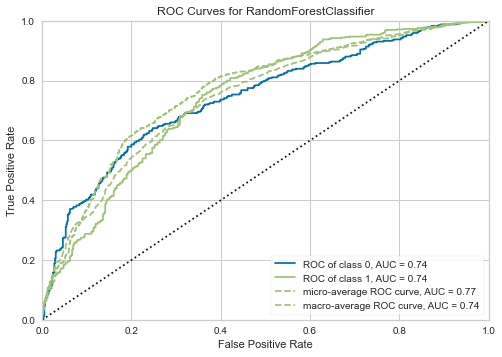

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [110]:
# from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import ROCAUC


visualizer = ROCAUC(model_rfc)
visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()

### ROC Naive Bayes

C:\Users\Jessa Francisco\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


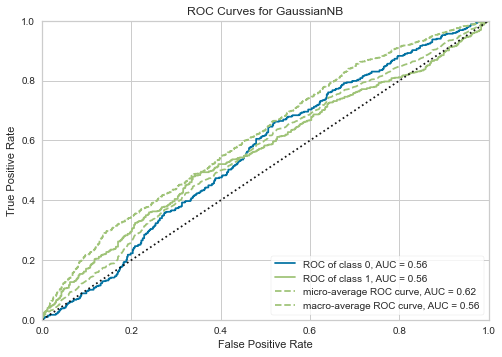

<AxesSubplot:title={'center':'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [111]:
# from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import ROCAUC


visualizer = ROCAUC(model_naive)
visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()

### ROC KNN

C:\Users\Jessa Francisco\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


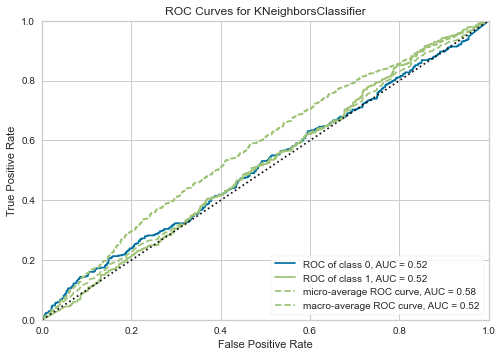

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [112]:
# from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import ROCAUC


visualizer = ROCAUC(model_knn)
visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()

### ROC SVM

C:\Users\Jessa Francisco\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


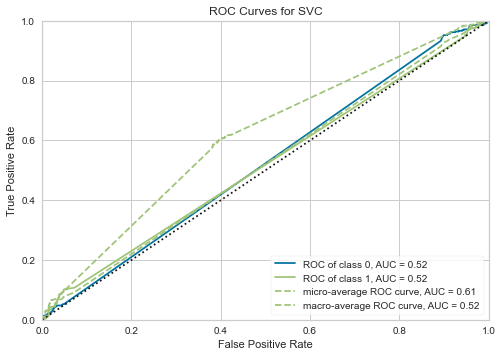

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [113]:
# from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import ROCAUC


visualizer = ROCAUC(model_svm)
visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()

### ROC Decision Tree

C:\Users\Jessa Francisco\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


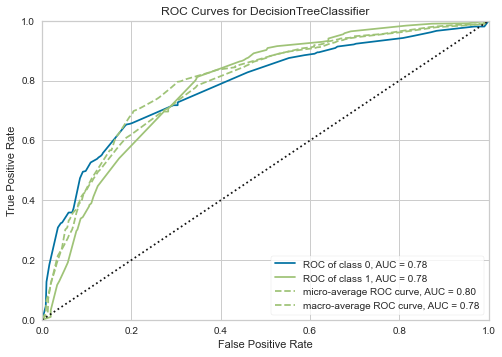

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [114]:
# from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import ROCAUC


visualizer = ROCAUC(model_tree)
visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()

Model 1

In [115]:
features = [
     'Pr1',
     'Pr2',
     'Pr3',
     'Pr4',
     'Pr5',
     'Oapr'
]
target ='Course'

In [116]:
x_train1 = data2_train[features]
y_train1 = data2_train[target]
x_test1 = data2_test[features]
y_test1 = data2_test[target]

In [117]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rfc1 = RandomForestClassifier(random_state = 0,n_estimators = 150, min_samples_split= 2, min_samples_leaf= 4, max_depth= 5)

# Train the model
model_rfc1.fit(x_train1, y_train1)

# Predict using the trained model
pred_rfc1 = model_rfc1.predict(x_test1)
accuracy1 = accuracy_score(y_test1, pred_rfc1)
print("Accuracy:", accuracy1)

Accuracy: 0.13409961685823754


# Validation

In [118]:
import pickle

In [119]:
#RANDOM FOREST
pickle.dump(model_rfc1, open('model_1.pkl', 'wb'))

In [120]:
#DECISION TREE
pickle.dump(model_tree, open('model_2.pkl', 'wb'))

In [121]:
model_1= pickle.load(open('model_1.pkl', 'rb'))

In [122]:
model_2= pickle.load(open('model_2.pkl', 'rb'))

In [129]:
val_data = pd.read_csv('val_data.csv')
val_data

,Unnamed: 0,Course,College,Graduated,Pr1,Pr2,Pr3,Pr4,Pr5,Oapr,Sum,English/Reading,Math/Logic,PR,Numerical_Course,Numerical_College
0,0,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,1,68.50,48.40,85.06,89.31,43.49,74.25,409.01,116.90,132.80,334.76,0,0
1,1,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,1,74.80,48.40,59.25,10.45,53.29,60.09,306.28,123.20,63.74,246.19,0,0
2,2,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,0,84.91,48.40,51.68,34.54,33.69,68.07,321.29,133.31,68.23,253.22,0,0
3,3,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,1,58.56,71.99,59.25,24.91,63.10,61.37,339.18,130.55,88.01,277.81,0,0
4,6,BS AGRICULTURE,College of Agriculture,1,52.90,77.12,29.96,75.28,53.29,61.37,349.92,130.02,128.57,288.55,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5220,6228,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,90.77,92.88,96.28,93.38,87.72,95.42,556.45,183.65,181.10,461.03,47,13
5221,6229,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,72.78,77.12,18.75,75.28,72.90,70.30,387.13,149.90,148.18,316.83,47,13
5222,6230,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,88.66,77.12,59.25,79.96,63.10,84.19,452.28,165.78,143.06,368.09,47,13
5223,6231,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,84.91,54.75,85.06,53.82,53.29,78.81,410.64,139.66,107.11,331.83,47,13


In [130]:
features = [
     'Pr1',
     'Pr2',
     'Pr3',
     'Pr4',
     'Pr5',
     'Oapr',
]

In [131]:
target='Course'

In [132]:
val_data

,Unnamed: 0,Course,College,Graduated,Pr1,Pr2,Pr3,Pr4,Pr5,Oapr,Sum,English/Reading,Math/Logic,PR,Numerical_Course,Numerical_College
0,0,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,1,68.50,48.40,85.06,89.31,43.49,74.25,409.01,116.90,132.80,334.76,0,0
1,1,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,1,74.80,48.40,59.25,10.45,53.29,60.09,306.28,123.20,63.74,246.19,0,0
2,2,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,0,84.91,48.40,51.68,34.54,33.69,68.07,321.29,133.31,68.23,253.22,0,0
3,3,BACHELOR OF AGRICULTURAL TECHNOLOGY,College of Agriculture,1,58.56,71.99,59.25,24.91,63.10,61.37,339.18,130.55,88.01,277.81,0,0
4,6,BS AGRICULTURE,College of Agriculture,1,52.90,77.12,29.96,75.28,53.29,61.37,349.92,130.02,128.57,288.55,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5220,6228,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,90.77,92.88,96.28,93.38,87.72,95.42,556.45,183.65,181.10,461.03,47,13
5221,6229,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,72.78,77.12,18.75,75.28,72.90,70.30,387.13,149.90,148.18,316.83,47,13
5222,6230,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,88.66,77.12,59.25,79.96,63.10,84.19,452.28,165.78,143.06,368.09,47,13
5223,6231,BACHELOR OF SPECIAL NEED EDUCATION,CTE,1,84.91,54.75,85.06,53.82,53.29,78.81,410.64,139.66,107.11,331.83,47,13


In [136]:
x_valid = val_data[features]
y_valid= val_data[target]

In [146]:
new_x = x_valid.sample(1)
new_y = y_valid[new_x.index.values]

# assume clf is your trained classifier and X is your test input data
proba_scores = model_1.predict_proba(new_x) # get the predicted probabilities

class_labels = model_1.classes_ # get the class labels

# get the top 3 results with the highest probability rank
top_3_indices = proba_scores.argsort()[:, :][:, ::-1]
print(new_x)
arr = np.array([])
# display the top 3 results with their probability rank
for i, indices in enumerate(top_3_indices):
    print(f"Top 3 results for test input {i}:")
    for j, index in enumerate(indices):
        label = class_labels[index]
        proba = proba_scores[i, index]
        print(f"Rank {j+1}: Class {label} with probability {proba:.4f}")
        
        # find the row index that matches the label
#         row_index = data.index[data['Course'] == label].tolist()[0]
        row_index=data2.loc[data2['Course'] == label, 'Numerical_Course'].values[0]
    
        # extract the Numerical_course value at the row index
#         fetch_course = data.loc[row_index, 'Numerical_Course']
        arr = np.append(arr,row_index)

       Pr1    Pr2    Pr3    Pr4   Pr5   Oapr
917  72.78  92.88  94.84  63.45  72.9  84.88
Top 3 results for test input 0:
Rank 1: Class BS CRIMINOLOGY with probability 0.0905
Rank 2: Class BS NURSING with probability 0.0669
Rank 3: Class BS BIOLOGY with probability 0.0655
Rank 4: Class BS ARCHITECTURE with probability 0.0621
Rank 5: Class BS SOCIAL WORK with probability 0.0571
Rank 6: Class BACHELOR OF SECONDARY EDUCATION with probability 0.0505
Rank 7: Class BS COMPUTER SCIENCE with probability 0.0479
Rank 8: Class AB POLITICAL SCIENCE with probability 0.0469
Rank 9: Class BACHELOR OF ELEMENTARY EDUCATION with probability 0.0430
Rank 10: Class BS INFORMATION TECHNOLOGY with probability 0.0372
Rank 11: Class BA ELS with probability 0.0297
Rank 12: Class BACHELOR OF SPECIAL NEED EDUCATION with probability 0.0290
Rank 13: Class BS MECHANICAL ENGINEERING with probability 0.0243
Rank 14: Class BS SANITARY ENGINEERING with probability 0.0215
Rank 15: Class BS ELECTRICAL ENGINEERING with pro

In [149]:
# class_labels = model_1.classes_ # get the class labels

grad_fetch = np.array([])
arr1 = np.array([])
for index in range(len(arr)):
    new_x['Numerical_Course'] = arr[index]
    print(arr[index])
    y_pred = model_2.predict(new_x)
    print("feature:",new_x)
    print("Predicted: ",y_pred)
    print("\n")
    
    if y_pred==1:
        
        if arr1.size == 3:
            break
        else:
            grad_fetch=int(arr[index])
            label = data2.loc[data2['Numerical_Course'] == grad_fetch, 'Course'].values[0]
            arr1 = np.append(arr1, label)

if arr1.size == 0:
    label = data2.loc[data2['Numerical_Course'] == int(arr[0]), 'Course'].values[0]
    arr1 = np.append(arr1, label)
    label = data2.loc[data2['Numerical_Course'] == int(arr[1]), 'Course'].values[0]
    arr1 = np.append(arr1, label)
    label = data2.loc[data2['Numerical_Course'] == int(arr[2]), 'Course'].values[0]
    arr1 = np.append(arr1, label)
    



16.0
feature:        Pr1    Pr2    Pr3    Pr4   Pr5   Oapr  Numerical_Course
917  72.78  92.88  94.84  63.45  72.9  84.88              16.0
Predicted:  [1]


7.0
feature:        Pr1    Pr2    Pr3    Pr4   Pr5   Oapr  Numerical_Course
917  72.78  92.88  94.84  63.45  72.9  84.88               7.0
Predicted:  [1]


40.0
feature:        Pr1    Pr2    Pr3    Pr4   Pr5   Oapr  Numerical_Course
917  72.78  92.88  94.84  63.45  72.9  84.88              40.0
Predicted:  [1]


4.0
feature:        Pr1    Pr2    Pr3    Pr4   Pr5   Oapr  Numerical_Course
917  72.78  92.88  94.84  63.45  72.9  84.88               4.0
Predicted:  [0]


10.0
feature:        Pr1    Pr2    Pr3    Pr4   Pr5   Oapr  Numerical_Course
917  72.78  92.88  94.84  63.45  72.9  84.88              10.0
Predicted:  [1]


